### 窗口创建和销毁

In [1]:
# opencv名字叫做opencv但是导包的时候, 叫做cv2
import cv2

In [ ]:
# python函数编码规范, 单词首字母小写, 单词与单词之间用下滑线连接.wait_key

In [3]:
# 创建窗口
# cv2.WINDOW_AUTOSIZE不允许修改窗口大小
# cv2.namedWindow('window', cv2.WINDOW_AUTOSIZE)
cv2.namedWindow('window', cv2.WINDOW_NORMAL)
# 更改窗口的大小
cv2.resizeWindow('window', 800, 600)
# 展示名字为window的窗口
cv2.imshow('window', 0)

# 等待按键
# waitKey会返回按键的ascii的值
# 0表示接受任意按键. 如果给其他的整数, 表示等待按键的时间. 单位是毫秒. 
#  可以利用waitkey来销毁窗口, 不用每次都重启python.
key = cv2.waitKey(0)
# key是int型, 最少都是16位, 但是ascii码是8位. 
if key & 0xFF == ord('q'):
    print('准备销毁窗口')
    cv2.destroyAllWindows()

准备销毁窗口


In [1]:
# 怎么计算q的ascii码
# ord是python中计算ascii的值的函数
ord('q')

113

### 读取图片

In [10]:
import matplotlib.pyplot as plt

In [5]:
# 默认是按照彩色图片来读取的. 
cat = cv2.imread('./cat.jpeg')

# numpy的ndarray
cat

array([[[204, 203, 205],
        [205, 204, 206],
        [206, 205, 207],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       [[204, 203, 205],
        [205, 204, 206],
        [206, 205, 207],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       [[204, 203, 205],
        [204, 203, 205],
        [205, 204, 206],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       ...,

       [[128, 129, 133],
        [133, 134, 138],
        [136, 137, 141],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]],

       [[124, 125, 129],
        [128, 129, 133],
        [130, 131, 135],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]],

       [[125, 126, 130],
        [129, 130, 134],
        [129, 130, 134],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

In [7]:
2 ** 8 - 1

255

In [8]:
cat.max()

255

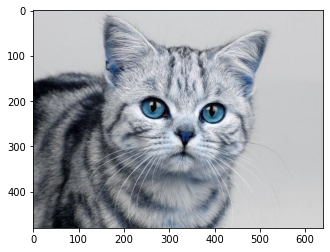

In [11]:
# 发现matplotlib显示的图片和真实的图片颜色不一样. 因为opencv读进来的图片数据的通道不是默认的RGB
# 而是BGR, 所以一般opencv读进来的图片不用要别方式去展示比如matplotlib
# 用opencv自己的方式去展示就没有问题.
plt.imshow(cat)

In [ ]:
import cv2


cat = cv2.imread('./cat.jpeg')
cv2.imshow('cat', cat)

while True:
    key = cv2.waitKey(0)
    if key & 0xFF == ord('q'):
        print('准备销毁窗口')
        cv2.destroyAllWindows()

准备销毁窗口


In [20]:
# 必须执行外部文件
# table和空格混用的缩进问题. 执行之后, 会自动把外部函数导入.
%run utils.py

In [21]:
cv_show('cat', cat)

In [1]:
import cv2


# 创建窗口
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.resizeWindow('img', 640, 480)

# 读取图片
img = cv2.imread('./cat.jpeg')

while True:
    cv2.imshow('img', img)
    key = cv2.waitKey(0)
    
    if key == ord('q'):
        break
    elif key == ord('s'):
        cv2.imwrite('./123.png', img)
    else:
        print(key)
    
cv2.destroyAllWindows()

In [ ]:
# 视频其实本质上就是由一幅一幅的图片组成的.
# 24帧, 30帧.60帧 

In [3]:
ord('q')

113

In [6]:
# 打开摄像头
import  cv2

cv2.namedWindow('video', cv2.WINDOW_NORMAL)
cv2.resizeWindow('video', 640, 480)


# 如果打开失败, 不会报错. 
# cap = cv2.VideoCapture(1)
cap = cv2.VideoCapture(0)

# 循环读取摄像头的每一帧
# while True:
while cap.isOpened():
    # 读一帧数据, 返回标记和这一帧数据. True表示读到了数据, False表示没读到数据. 
    ret, frame = cap.read()
    
    # 可以根据ret做个判断
    if not ret:
        # 没读到数据, 直接退出
        break
        
    # 显示数据
    cv2.imshow('video', frame)
    
    key = cv2.waitKey(10)
    if key & 0xFF == ord('q'):
        break
        
# 别忘了释放资源
cap.release()
cv2.destroyAllWindows()

In [1]:
# 打开视频
# 打开摄像头
import  cv2

cv2.namedWindow('video', cv2.WINDOW_NORMAL)
cv2.resizeWindow('video', 640, 480)


# 如果打开失败, 不会报错. 
# cap = cv2.VideoCapture(1)
# 打开视频, 输入视频的地址
cap = cv2.VideoCapture('./1.mp4')

# 循环读取摄像头的每一帧
# while True:
while cap.isOpened():
    # 读一帧数据, 返回标记和这一帧数据. True表示读到了数据, False表示没读到数据. 
    ret, frame = cap.read()
    
    # 可以根据ret做个判断
    if not ret:
        # 没读到数据, 直接退出
        break
        
    # 显示数据
    cv2.imshow('video', frame)
    
    # 假如一个视频是30帧, 那么每张图之间要间隔多少毫秒
    # 只能是整数
    key = cv2.waitKey(1000 // 30)
    if key & 0xFF == ord('q'):
        break
        
# 别忘了释放资源
cap.release()
cv2.destroyAllWindows()

In [2]:
cap = cv2.VideoCapture(0)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# avi格式的视频
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# 创建videowriter
# vw = cv2.VideoWriter('output.mp4', fourcc, 30, (640, 480))
vw = cv2.VideoWriter('output3.avi', fourcc, 30, (1280, 720))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    # 写每一帧数据
    vw.write(frame)
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break
        
# 别忘了release
cap.release()
vw.release()
cv2.destroyAllWindows()

In [1]:
# opencv控制鼠标
import cv2
import numpy as np

# 函数名可以随便取, 但是参数必须是5个.
# event表示鼠标事件, x,y是鼠标的坐标
# flags鼠标的组合按键
def mouse_callback(event, x, y, flags, userdata):
    print(event, x, y, flags, userdata)
    # 按下鼠标右键退出
    if event == 2:
        cv2.destroyAllWindows()
    
# mouse的复数是什么?
# 创建窗口
cv2.namedWindow('mouse', cv2.WINDOW_NORMAL)
# 宽度和高度
cv2.resizeWindow('mouse', 640, 360)

# 设置鼠标回调函数
cv2.setMouseCallback('mouse', mouse_callback, '123')

# 生成全黑的图片
img = np.zeros((360, 640, 3), np.uint8)
while True:
    cv2.imshow('mouse', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
        
cv2.destroyAllWindows()

0 1 15 0 123
0 2 15 0 123
0 4 15 0 123
0 7 15 0 123
0 10 15 0 123
0 10 15 0 123
1 10 15 1 123
0 10 15 1 123
0 10 15 1 123
0 10 15 1 123
0 10 15 1 123
0 11 15 1 123
0 12 16 1 123
0 14 18 1 123
0 15 18 1 123
0 16 19 1 123
0 17 20 1 123
0 21 23 1 123
0 24 26 1 123
0 27 28 1 123
0 28 28 1 123
0 29 28 1 123
0 31 29 1 123
0 31 30 1 123
0 33 30 1 123
0 36 32 1 123
0 38 33 1 123
0 40 35 1 123
0 41 35 1 123
0 43 36 1 123
0 45 39 1 123
0 48 41 1 123
0 50 42 1 123
0 53 44 1 123
0 55 47 1 123
0 56 47 1 123
0 59 49 1 123
0 61 52 1 123
0 63 54 1 123
0 68 58 1 123
0 70 60 1 123
0 72 62 1 123
0 73 62 1 123
0 73 63 1 123
0 75 64 1 123
0 76 65 1 123
0 76 65 1 123
0 78 67 1 123
0 79 67 1 123
0 81 69 1 123
0 81 69 1 123
0 82 69 1 123
0 83 69 1 123
0 84 71 1 123
0 85 71 1 123
0 87 73 1 123
0 87 74 1 123
0 92 76 1 123
0 92 76 1 123
0 93 78 1 123
0 94 78 1 123
0 95 80 1 123
0 97 82 1 123
0 97 82 1 123
0 97 82 1 123
0 97 82 1 123
4 97 82 0 123
0 97 82 0 123
0 97 82 0 123
0 97 82 0 123


In [3]:
# trackbar的使用
import cv2 
import numpy as np

# 创建窗口
cv2.namedWindow('trackbar', cv2.WINDOW_NORMAL)
cv2.resizeWindow('trackbar', 640, 480)

# 定义回调函数
def callback(value):
#     print(value)
    pass
    
# 创建3个trackbar
cv2.createTrackbar('R', 'trackbar', 0, 255, callback)
cv2.createTrackbar('G', 'trackbar', 0, 255, callback)
cv2.createTrackbar('B', 'trackbar', 0, 255, callback)

# 创建背景图片
img = np.zeros((480, 640, 3), np.uint8)

while True:
    # 获取当前trackbar的值
    r = cv2.getTrackbarPos('R', 'trackbar')
    g = cv2.getTrackbarPos('G', 'trackbar')
    b = cv2.getTrackbarPos('B', 'trackbar')
    
    # 用获取到的三个值修改背景图片颜色
    img[:] = [b, g, r]
    cv2.imshow('trackbar', img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
        
cv2.destroyAllWindows()

In [9]:
img

array([[[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       ...,

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]]

In [1]:
# 找到摄像头原来的分辨率
# 打开视频
# 打开摄像头
import  cv2



# 如果打开失败, 不会报错. 
# cap = cv2.VideoCapture(1)
# 打开视频, 输入视频的地址
cap = cv2.VideoCapture(0)

# 循环读取摄像头的每一帧
# while True:
while cap.isOpened():
    # 读一帧数据, 返回标记和这一帧数据. True表示读到了数据, False表示没读到数据. 
    ret, frame = cap.read()
    
    # 可以根据ret做个判断
    if not ret:
        # 没读到数据, 直接退出
        break
        
    # 显示数据
    cv2.imshow('video', frame)
    
    # 假如一个视频是30帧, 那么每张图之间要间隔多少毫秒
    # 只能是整数
    key = cv2.waitKey(1000 // 30)
    if key & 0xFF == ord('q'):
        break
        
# 别忘了释放资源
cap.release()
cv2.destroyAllWindows()